In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sbn

/usr/local/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
query = """ 
    select dq.event_date, c.label, dq.close_value
    from company c
    inner join daily_quote dq on c.id = dq.company_id
    where c.label in (
         'BBDC4', 'EQTL3', 'BRML3', 'BRAP4', 'EGIE3', 'ELET3', 'ENBR3', 'ABEV3', 'NATU3', 'CCRO3')
    and (now() - dq.event_date) <= interval '3 months'
    order by dq.event_date;"""

In [3]:
conn = psycopg2.connect(
            database="postgres",
            user="postgres",
            connect_timeout=3,
            options='-c statement_timeout=3000')
raw_df = pd.read_sql(query, conn)
conn.close()

In [4]:
raw_df.columns = ['Data', 'Sigla', 'VF']
raw_df.set_index(['Data', 'Sigla'], inplace=True)

In [13]:
df = (raw_df.unstack()
      .replace({0: np.NaN})
      .fillna(method='ffill'))
df.tail()

VF                                                          \
Sigla       ABEV3  BBDC4  BRAP4  BRML3  CCRO3  EGIE3  ELET3  ENBR3  EQTL3   
Data                                                                        
2019-02-11  18.71  44.41  26.20  13.74  14.15  43.37  35.81  17.71  83.50   
2019-02-12  18.67  45.30  27.48  13.56  14.19  43.72  35.74  18.11  83.21   
2019-02-13  18.39  44.60  27.82  13.60  13.75  43.02  36.81  18.05  84.39   
2019-02-14  18.39  46.30  27.98  13.90  13.75  43.59  36.81  18.05  84.30   
2019-02-15  18.39  46.00  28.08  13.82  13.75  43.18  36.81  18.05  84.00   

                   
Sigla       NATU3  
Data               
2019-02-11  44.76  
2019-02-12  45.50  
2019-02-13  45.20  
2019-02-14  45.20  
2019-02-15  45.20

In [6]:
columns = pd.Series(df.columns.levels[1].values)

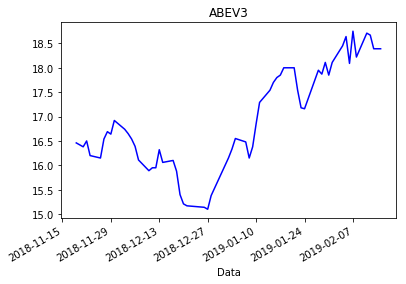

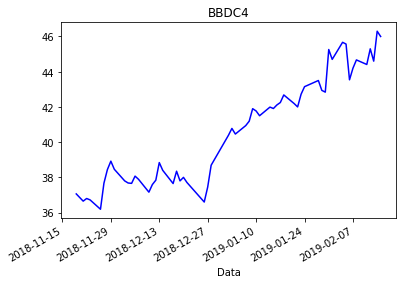

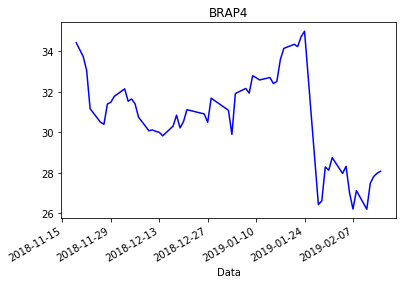

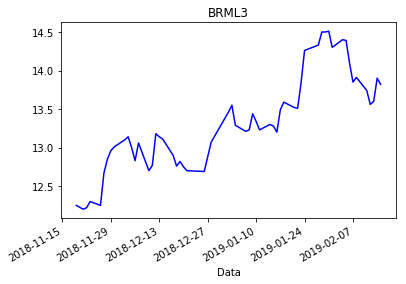

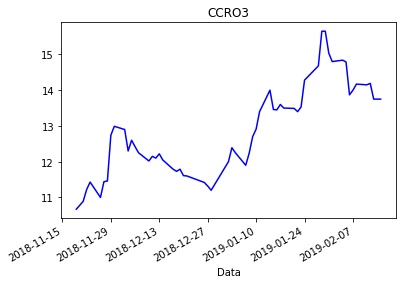

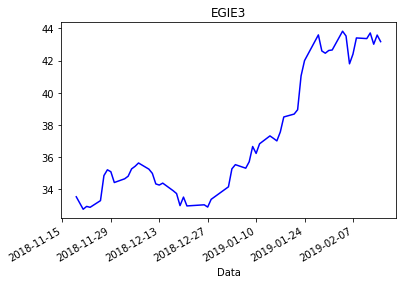

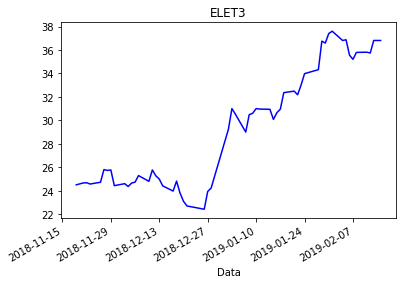

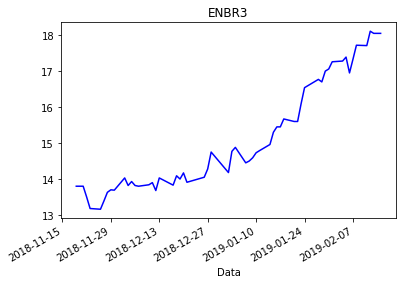

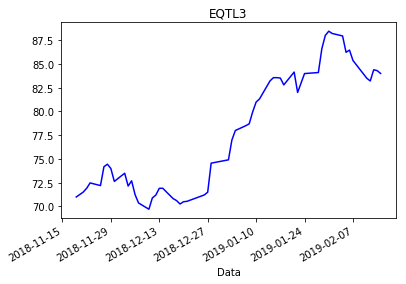

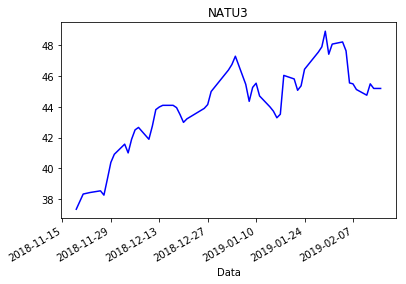

In [7]:
for label in df['VF']:
    fig = plt.figure()
    company = df['VF'][label]
    props = {
        'title': company.name
    }
    ax = fig.add_subplot(1, 1, 1)
    ax.label = company.name
    company.plot(ax=ax, style='b-')
    ax.set(**props)

In [8]:
# bbdc4 = df['VF']['BBDC4']
# x = bbdc4.index.values
# y = bbdc4.values
# fig = plt.figure()
# fig.add_sub_plots()
# ax.plot(x, y, 'k--')
# plt.show()

In [9]:
# bbdc4 = df['VF']['BBDC4']
# x = bbdc4.index.values
# y = bbdc4.values
# fig, ax = plt.subplots()
# ax.plot(x, y, 'k--')
# plt.show()

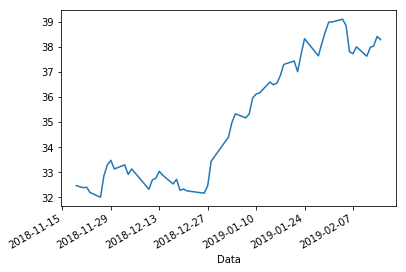

In [10]:

percentages = [
    (16.0, 'BBDC4'), (14.0, 'EQTL3'), (13.0, 'BRML3'), (13.0, 'BRAP4'), (10.0, 'EGIE3'), (9.0, 'ELET3'), (8.0, 'ENBR3'), (6.0, 'ABEV3'), (6.0, 'NATU3'), (6.0, 'CCRO3')
]

virtual_portfolio = df.copy()
for (v, k) in percentages:
    virtual_portfolio['VF'][k] = virtual_portfolio['VF'][k] * v / 100.0

virtual_portfolio = np.sum(virtual_portfolio, axis=1)
virtual_portfolio.plot()
                    


In [11]:
initial_value = virtual_portfolio.iloc[0]
current_value = virtual_portfolio.iloc[len(virtual_portfolio) - 1]
profit = current_value - initial_value


# Lucro nominal e percentual

In [12]:
print('Lucro nominal=%s; Lucro percentual=%s' % (profit, profit/initial_value))

Lucro nominal=5.8156999999999925; Lucro percentual=0.17912870457639515
